In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
colnames = ['gene', 'distance']

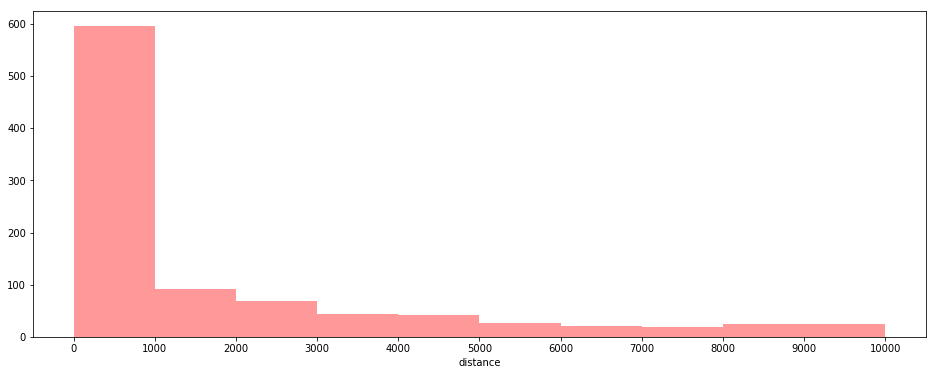

In [3]:
dmel_df = pd.read_table('output/dmel_promoter_firstSE_dis.txt', header=None, names=colnames)
fig = plt.figure(figsize=(16.0, 6.0))
ticks = range(0, 11000, 1000)
plt.xticks(ticks)
sns.distplot(dmel_df['distance'], bins=ticks, kde=False, color="r")

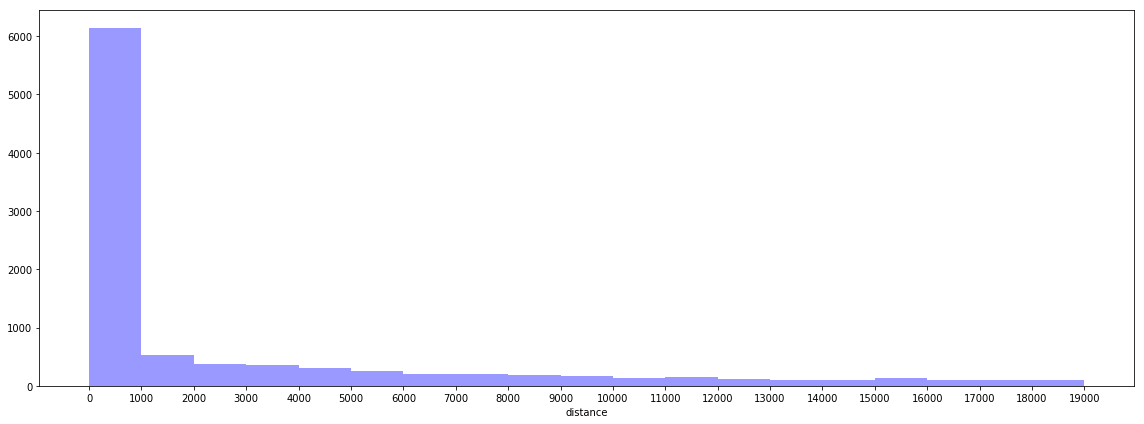

In [4]:
human_df = pd.read_table('output/human_promoter_firstSE_dis.txt', header=None, names=colnames)
fig = plt.figure(figsize=(16.0, 6.0))
ticks = range(0, 20000, 1000)
plt.xticks(ticks)
sns.distplot(human_df['distance'], bins=ticks, kde=False, color="b")
plt.tight_layout()

In [5]:
dmel_df['distance'].quantile(0.77)

10619.640000000003

In [6]:
human_df['distance'].quantile(0.77)

20612.489999999976

In [21]:
gene_list = human_df[human_df['distance'] < 20000]['gene']

In [2]:
with open('input/rf_data/human_weight_rf_data.pickle', 'rb') as fh:
    X, Y, Tf_list = pickle.load(fh)

In [4]:
Y

,Gene,PSI,Tissue
0,ENSG00000000457,0.425,CD14-positive_monocyte
1,ENSG00000001167,0.545,CD14-positive_monocyte
2,ENSG00000001461,0.040,CD14-positive_monocyte
3,ENSG00000001497,0.935,CD14-positive_monocyte
4,ENSG00000001631,0.585,CD14-positive_monocyte
5,ENSG00000002330,0.035,CD14-positive_monocyte
6,ENSG00000002549,0.895,CD14-positive_monocyte
7,ENSG00000002822,0.695,CD14-positive_monocyte
8,ENSG00000002834,0.590,CD14-positive_monocyte
9,ENSG00000002919,0.455,CD14-positive_monocyte


In [25]:
Y_ind = Y[Y['Gene'].isin(gene_list)].index.values
Y = Y.loc[Y_ind]
X = X[Y_ind]

In [26]:
with open('human_weight_filter_by_distance_rf_data.pickle', 'wb') as fh:
    pickle.dump((X, Y, Tf_list), fh)